<a href="https://colab.research.google.com/github/ALW-N/NNDL_LAB/blob/main/Alwin_207_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

# Load dataset (ensure you have the dataset from the given Kaggle link)
from tensorflow.keras.datasets import mnist

# Kuzushiji dataset is similar to the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values (0-255) to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to 1D array of 28x28 pixels (784 features)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split dataset into training and testing sets (80% training, 20% testing)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#2. Radial Basis Function (RBF) Network Implementation

In [3]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Input, Dense
from keras.models import Model
from tensorflow.keras.datasets import mnist  # Using MNIST as an alternative

# Load dataset (replace with Kuzushiji dataset if available)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values (0-255) to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to 1D array of 28x28 pixels (784 features)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Custom RBF Layer
class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, units, gamma=1.0, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units  # Number of RBF neurons
        self.gamma = tf.constant(gamma, dtype=tf.float32)

    def build(self, input_shape):
        # Initialize the centers with zeros, we'll update this later when the model is built
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[-1]),
                                       initializer='zeros',
                                       trainable=False)

        # Define betas (trainable inverse variance for Gaussian RBFs)
        self.betas = self.add_weight(name='betas', shape=(self.units,),
                                     initializer='ones', trainable=True)

    def call(self, inputs):
        # Compute the Euclidean distance between inputs and centers
        expanded_inputs = tf.expand_dims(inputs, 1)
        expanded_centers = tf.expand_dims(self.centers, 0)
        distances = tf.reduce_sum(tf.square(expanded_inputs - expanded_centers), axis=-1)

        # Apply Gaussian RBF function
        return tf.exp(-self.betas * distances)

    def initialize_centers(self, X_train):
        # Use KMeans to set the centers based on training data
        kmeans = KMeans(n_clusters=self.units)
        kmeans.fit(X_train)
        self.centers.assign(kmeans.cluster_centers_)  # Assign the KMeans centers to the layer's centers

# Create the RBF network model
def build_rbf_network(input_dim, num_classes, num_rbf_neurons, gamma=1.0):
    inputs = Input(shape=(input_dim,))
    rbf_layer = RBFLayer(units=num_rbf_neurons, gamma=gamma)
    rbf_outputs = rbf_layer(inputs)
    outputs = Dense(num_classes, activation='softmax')(rbf_outputs)
    model = Model(inputs, outputs)
    return model, rbf_layer

# Parameters for the model
input_dim = 784  # 28x28 images flattened
num_classes = 10  # 10 character classes
num_rbf_neurons = 100  # Number of RBF neurons
gamma = 0.1  # Gamma for RBF

# Build the model
model, rbf_layer = build_rbf_network(input_dim, num_classes, num_rbf_neurons, gamma)

# Initialize the RBF layer centers with KMeans on the training data
rbf_layer.initialize_centers(X_train)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1139 - loss: 2.2832 - val_accuracy: 0.2477 - val_loss: 2.0993
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2586 - loss: 2.0614 - val_accuracy: 0.2886 - val_loss: 1.9692
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3160 - loss: 1.9272 - val_accuracy: 0.3832 - val_loss: 1.7973
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4179 - loss: 1.7709 - val_accuracy: 0.4507 - val_loss: 1.6916
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4669 - loss: 1.6766 - val_accuracy: 0.5021 - val_loss: 1.6260
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4866 - loss: 1.6020 - val_accuracy: 0.5167 - val_loss: 1.5352
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5158 - loss: 1.5245 - val_accuracy: 0.5182 - val_loss: 1.4695
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5290 - loss: 1.4647 - 

#K-means for center selection

In [4]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Input, Dense
from keras.models import Model
from tensorflow.keras.datasets import mnist  # Using MNIST as an alternative

# Load dataset (replace with Kuzushiji dataset if available)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values (0-255) to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to 1D array of 28x28 pixels (784 features)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Custom RBF Layer
class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, units, gamma=1.0, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units  # Number of RBF neurons
        self.gamma = tf.constant(gamma, dtype=tf.float32)

    def build(self, input_shape):
        # Initialize the centers with zeros, we'll update this later when the model is built
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[-1]),
                                       initializer='zeros',
                                       trainable=False)

        # Define betas (trainable inverse variance for Gaussian RBFs)
        self.betas = self.add_weight(name='betas', shape=(self.units,),
                                     initializer='ones', trainable=True)

    def call(self, inputs):
        # Compute the Euclidean distance between inputs and centers
        expanded_inputs = tf.expand_dims(inputs, 1)
        expanded_centers = tf.expand_dims(self.centers, 0)
        distances = tf.reduce_sum(tf.square(expanded_inputs - expanded_centers), axis=-1)

        # Apply Gaussian RBF function
        return tf.exp(-self.betas * distances)

    def initialize_centers(self, X_train):
        # Use KMeans to set the centers based on training data
        kmeans = KMeans(n_clusters=self.units)
        kmeans.fit(X_train)
        self.centers.assign(kmeans.cluster_centers_)  # Assign the KMeans centers to the layer's centers

# Create the RBF network model
def build_rbf_network(input_dim, num_classes, num_rbf_neurons, gamma=1.0):
    inputs = Input(shape=(input_dim,))
    rbf_layer = RBFLayer(units=num_rbf_neurons, gamma=gamma)
    rbf_outputs = rbf_layer(inputs)
    outputs = Dense(num_classes, activation='softmax')(rbf_outputs)
    model = Model(inputs, outputs)
    return model, rbf_layer

# Parameters for the model
input_dim = 784  # 28x28 images flattened
num_classes = 10  # 10 character classes
num_rbf_neurons = 100  # Number of RBF neurons
gamma = 0.1  # Gamma for RBF

# Build the model
model, rbf_layer = build_rbf_network(input_dim, num_classes, num_rbf_neurons, gamma)

# Initialize the RBF layer centers with KMeans on the training data
rbf_layer.initialize_centers(X_train)

# Compile the model with a learning rate of 0.01 using Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 100 epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2469 - loss: 2.0254 - val_accuracy: 0.4739 - val_loss: 1.5215
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4675 - loss: 1.5127 - val_accuracy: 0.5358 - val_loss: 1.3322
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5291 - loss: 1.3302 - val_accuracy: 0.5583 - val_loss: 1.2746
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5534 - loss: 1.2798 - val_accuracy: 0.5997 - val_loss: 1.1716
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5505 - loss: 1.2590 - val_accuracy: 0.5439 - val_loss: 1.2242
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5693 - loss: 1.2273 - val_accuracy: 0.6006 - val_loss: 1.1690
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5893 - loss: 1.1822 - val_accuracy: 0.6238 - val_loss: 1.0813
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6003 - loss: 1

In [5]:
# RBF Network Class
class RBFNetwork:
    def __init__(self, centers, sigma, num_outputs):
        self.centers = centers
        self.sigma = sigma
        self.weights = np.random.randn(len(centers), num_outputs)

    def rbf_layer(self, X):
        rbf_activations = np.zeros((X.shape[0], len(self.centers)))
        for i, center in enumerate(self.centers):
            rbf_activations[:, i] = np.exp(-np.linalg.norm(X - center, axis=1)**2 / (2 * self.sigma**2))
        return rbf_activations

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        rbf_activations = self.rbf_layer(X)
        return self.softmax(np.dot(rbf_activations, self.weights))

    def train(self, X, y, learning_rate=0.01, epochs=100):
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                rbf_activations = self.rbf_layer(X[i:i+1])
                output = self.softmax(np.dot(rbf_activations, self.weights))
                error = output - y[i:i+1]
                self.weights -= learning_rate * np.dot(rbf_activations.T, error)
            if epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs} complete")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7715 - loss: 0.6507
Test Accuracy: 79.86%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


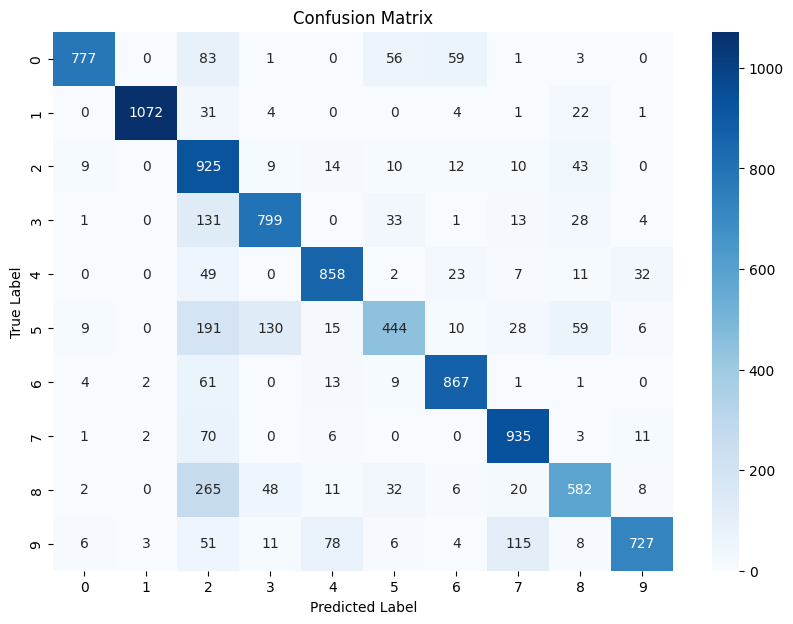

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       980
           1       0.99      0.94      0.97      1135
           2       0.50      0.90      0.64      1032
           3       0.80      0.79      0.79      1010
           4       0.86      0.87      0.87       982
           5       0.75      0.50      0.60       892
           6       0.88      0.91      0.89       958
           7       0.83      0.91      0.87      1028
           8       0.77      0.60      0.67       974
           9       0.92      0.72      0.81      1009

    accuracy                           0.80     10000
   macro avg       0.83      0.79      0.80     10000
weighted avg       0.83      0.80      0.80     10000



In [7]:
# Import necessary libraries for evaluation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test data (accuracy)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Get predictions on the test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on test data
y_pred = rbf_net.forward(X_test)

# Convert one-hot encoded predictions back to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print(conf_matrix)

# Visualize the confusion matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
